In [156]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing, metrics
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

# Set plot style and configure warnings
plt.style.use('seaborn-v0_8')
import warnings
warnings.filterwarnings('ignore')

# Configure pandas to display all columns in the output
pd.set_option('display.max_columns', None)

# Load the data into a pandas DataFrame
data = pd.read_csv('Cancer_Data.csv')
df = pd.DataFrame(data)

# Display the DataFrame to confirm data loading
df


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [157]:
# Drop unnecessary columns 'id' and 'Unnamed: 32' from the DataFrame
df = df.drop(columns=['id', 'Unnamed: 32'])
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [158]:
# Display information about the DataFrame, including data types and non-null counts for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [159]:
# Display statistical summary of the DataFrame, including count, mean, std, min, 25%, 50%, 75%, and max for each numerical column
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


EDA

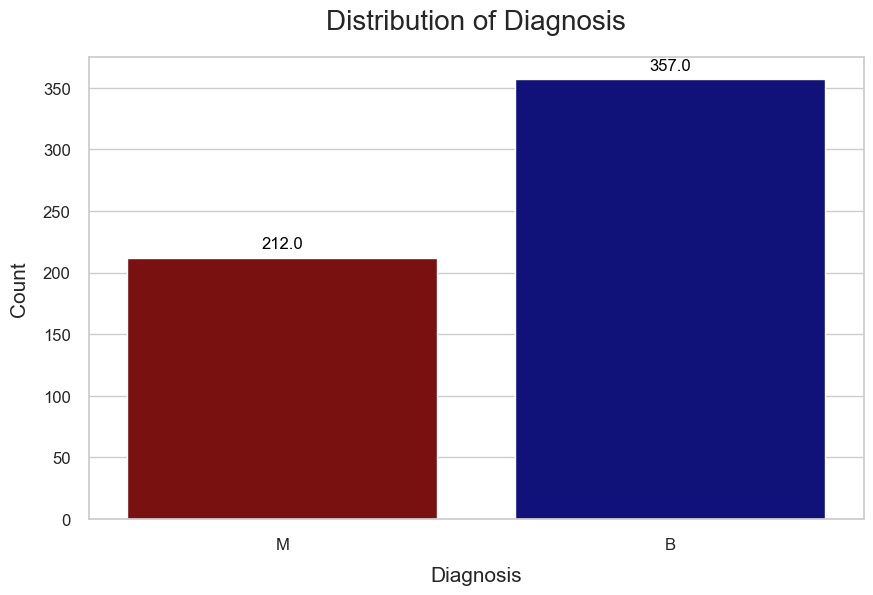

B    357
M    212
Name: diagnosis, dtype: int64


In [160]:
# Set the plot style
sns.set(style="whitegrid")

# Define a consistent color palette for M and B
palette = {'M': 'darkred', 'B': 'darkblue'}

# Create a count plot to visualize the distribution of the 'diagnosis' variable
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='diagnosis', data=df, palette=palette)

# Customize the plot
ax.set_title('Distribution of Diagnosis', fontsize=20, pad=20)
ax.set_xlabel('Diagnosis', fontsize=15, labelpad=10)
ax.set_ylabel('Count', fontsize=15, labelpad=10)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Annotate the count on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), 
                textcoords='offset points')

# Display the count plot
plt.show()

# Display the count of each diagnosis category
print(df['diagnosis'].value_counts())


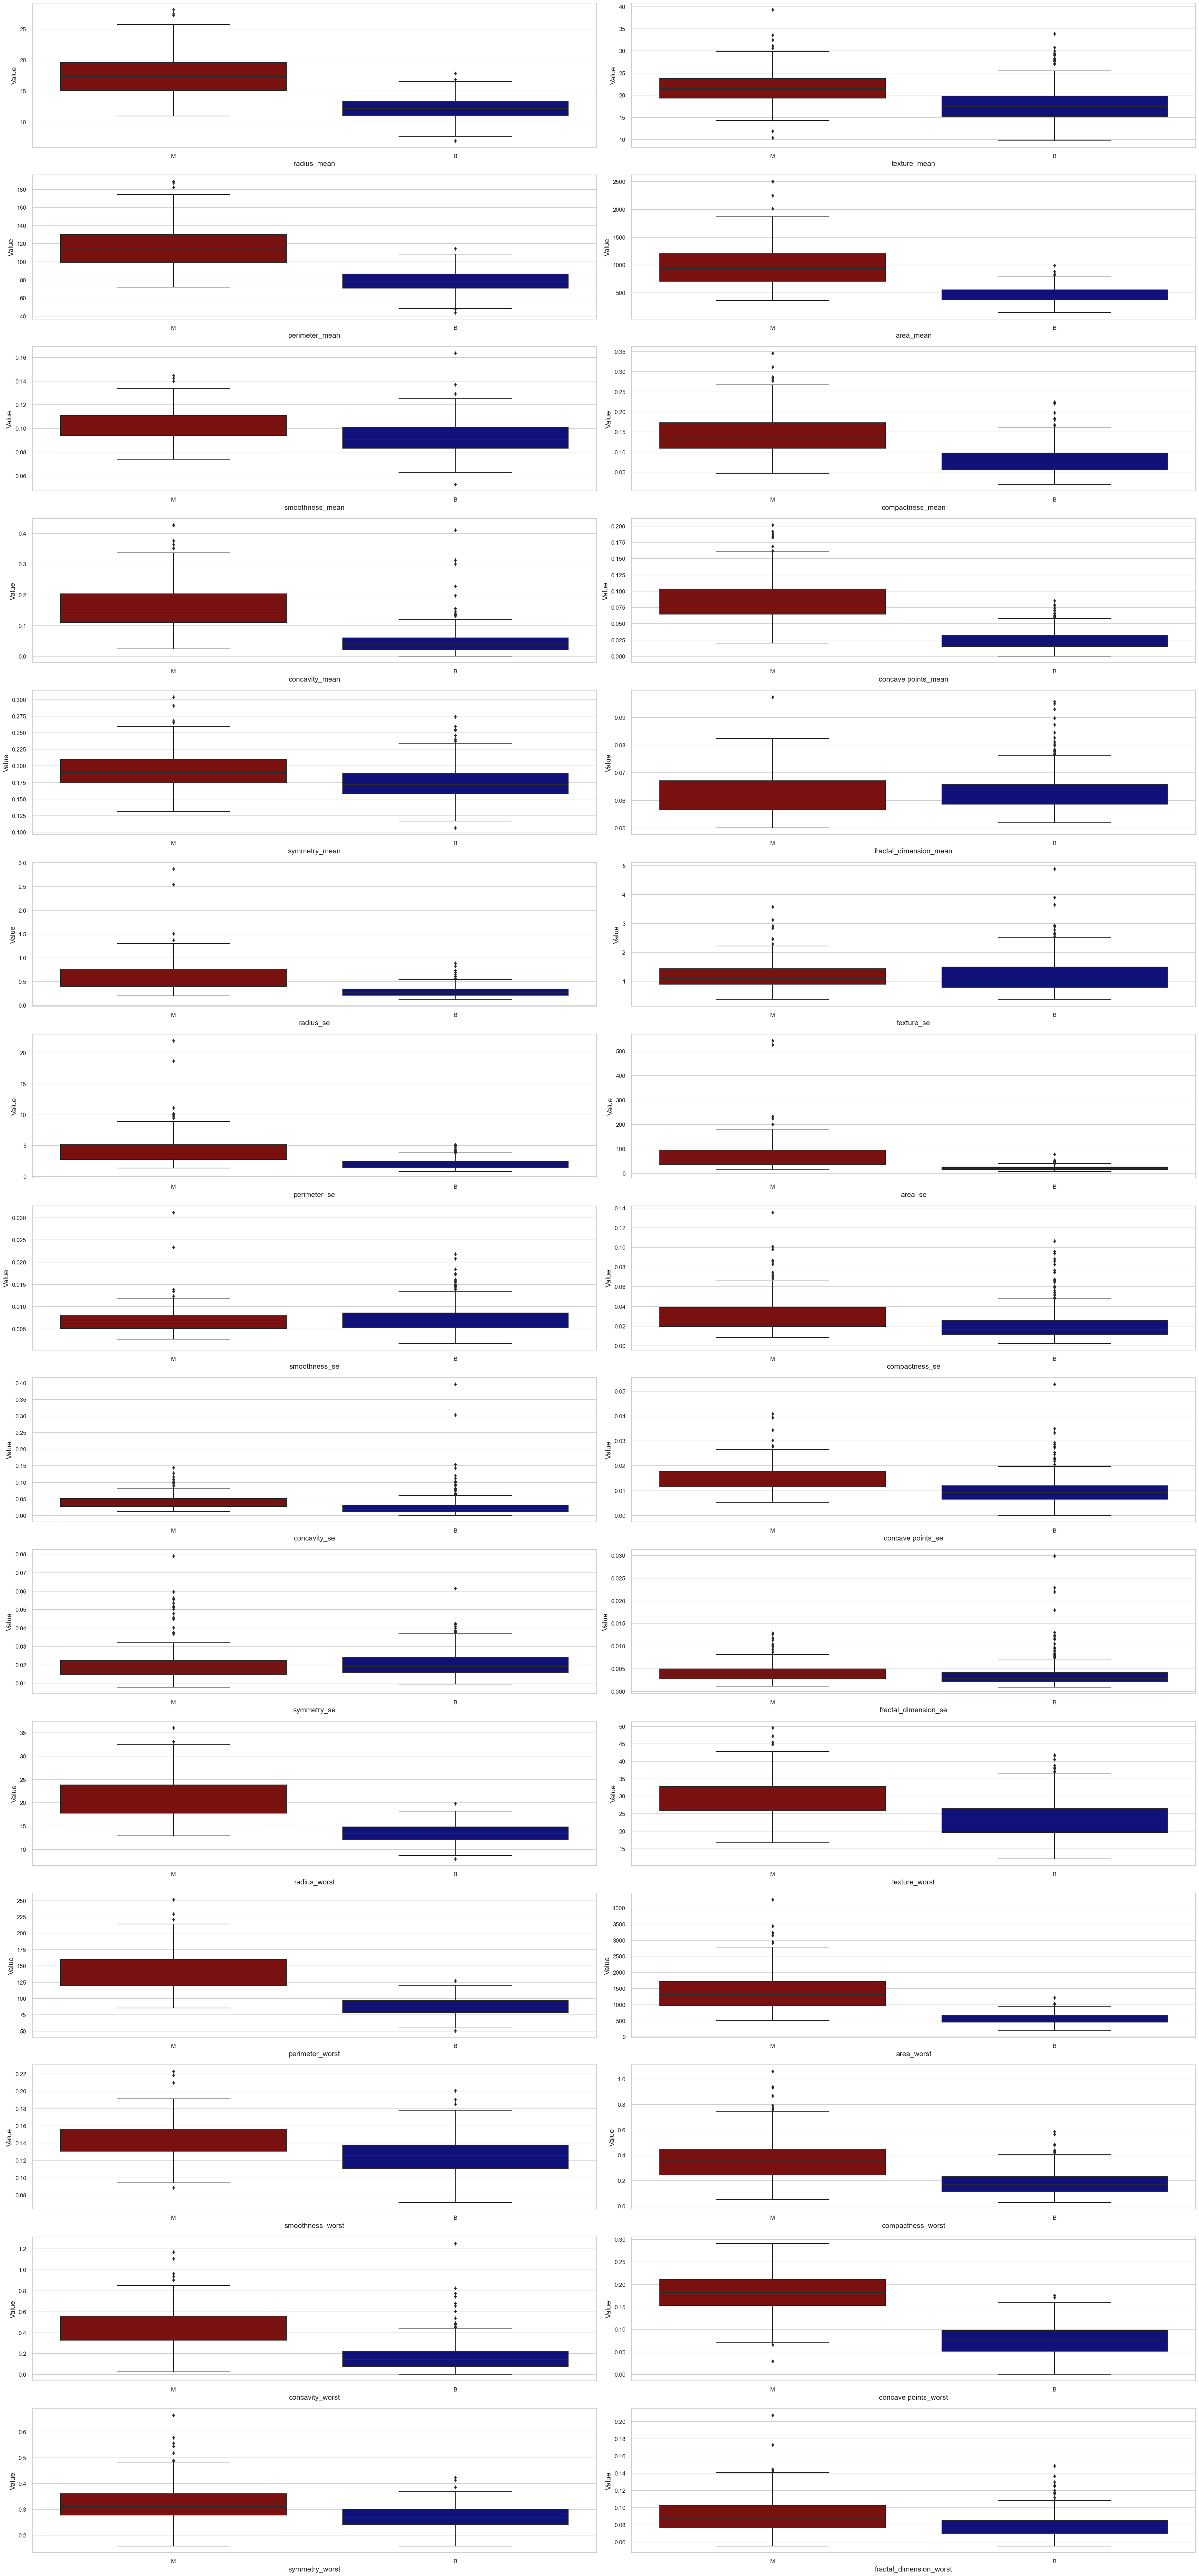

In [161]:
# Visualize all features using box plots
features = df.columns.drop('diagnosis')  # Drop 'diagnosis' column from the features list

# Determine the number of rows and columns for the subplot grid
n_rows = len(features) // 2 + len(features) % 2
fig, axs = plt.subplots(ncols=2, nrows=n_rows, figsize=(35, 5 * n_rows), dpi=100)
axs = axs.flatten()  # Flatten the array of axes for easy iteration

# Loop through each feature and create a box plot
for i, col in enumerate(features):
    sns.boxplot(x='diagnosis', y=col, data=df, ax=axs[i], palette=palette)
    axs[i].set_xlabel(col, fontsize=15)
    axs[i].set_ylabel('Value', fontsize=15)
    axs[i].tick_params(axis='x', labelsize=12)
    axs[i].tick_params(axis='y', labelsize=12)

# Adjust layout to prevent overlap and display the plot
plt.tight_layout()
plt.show()

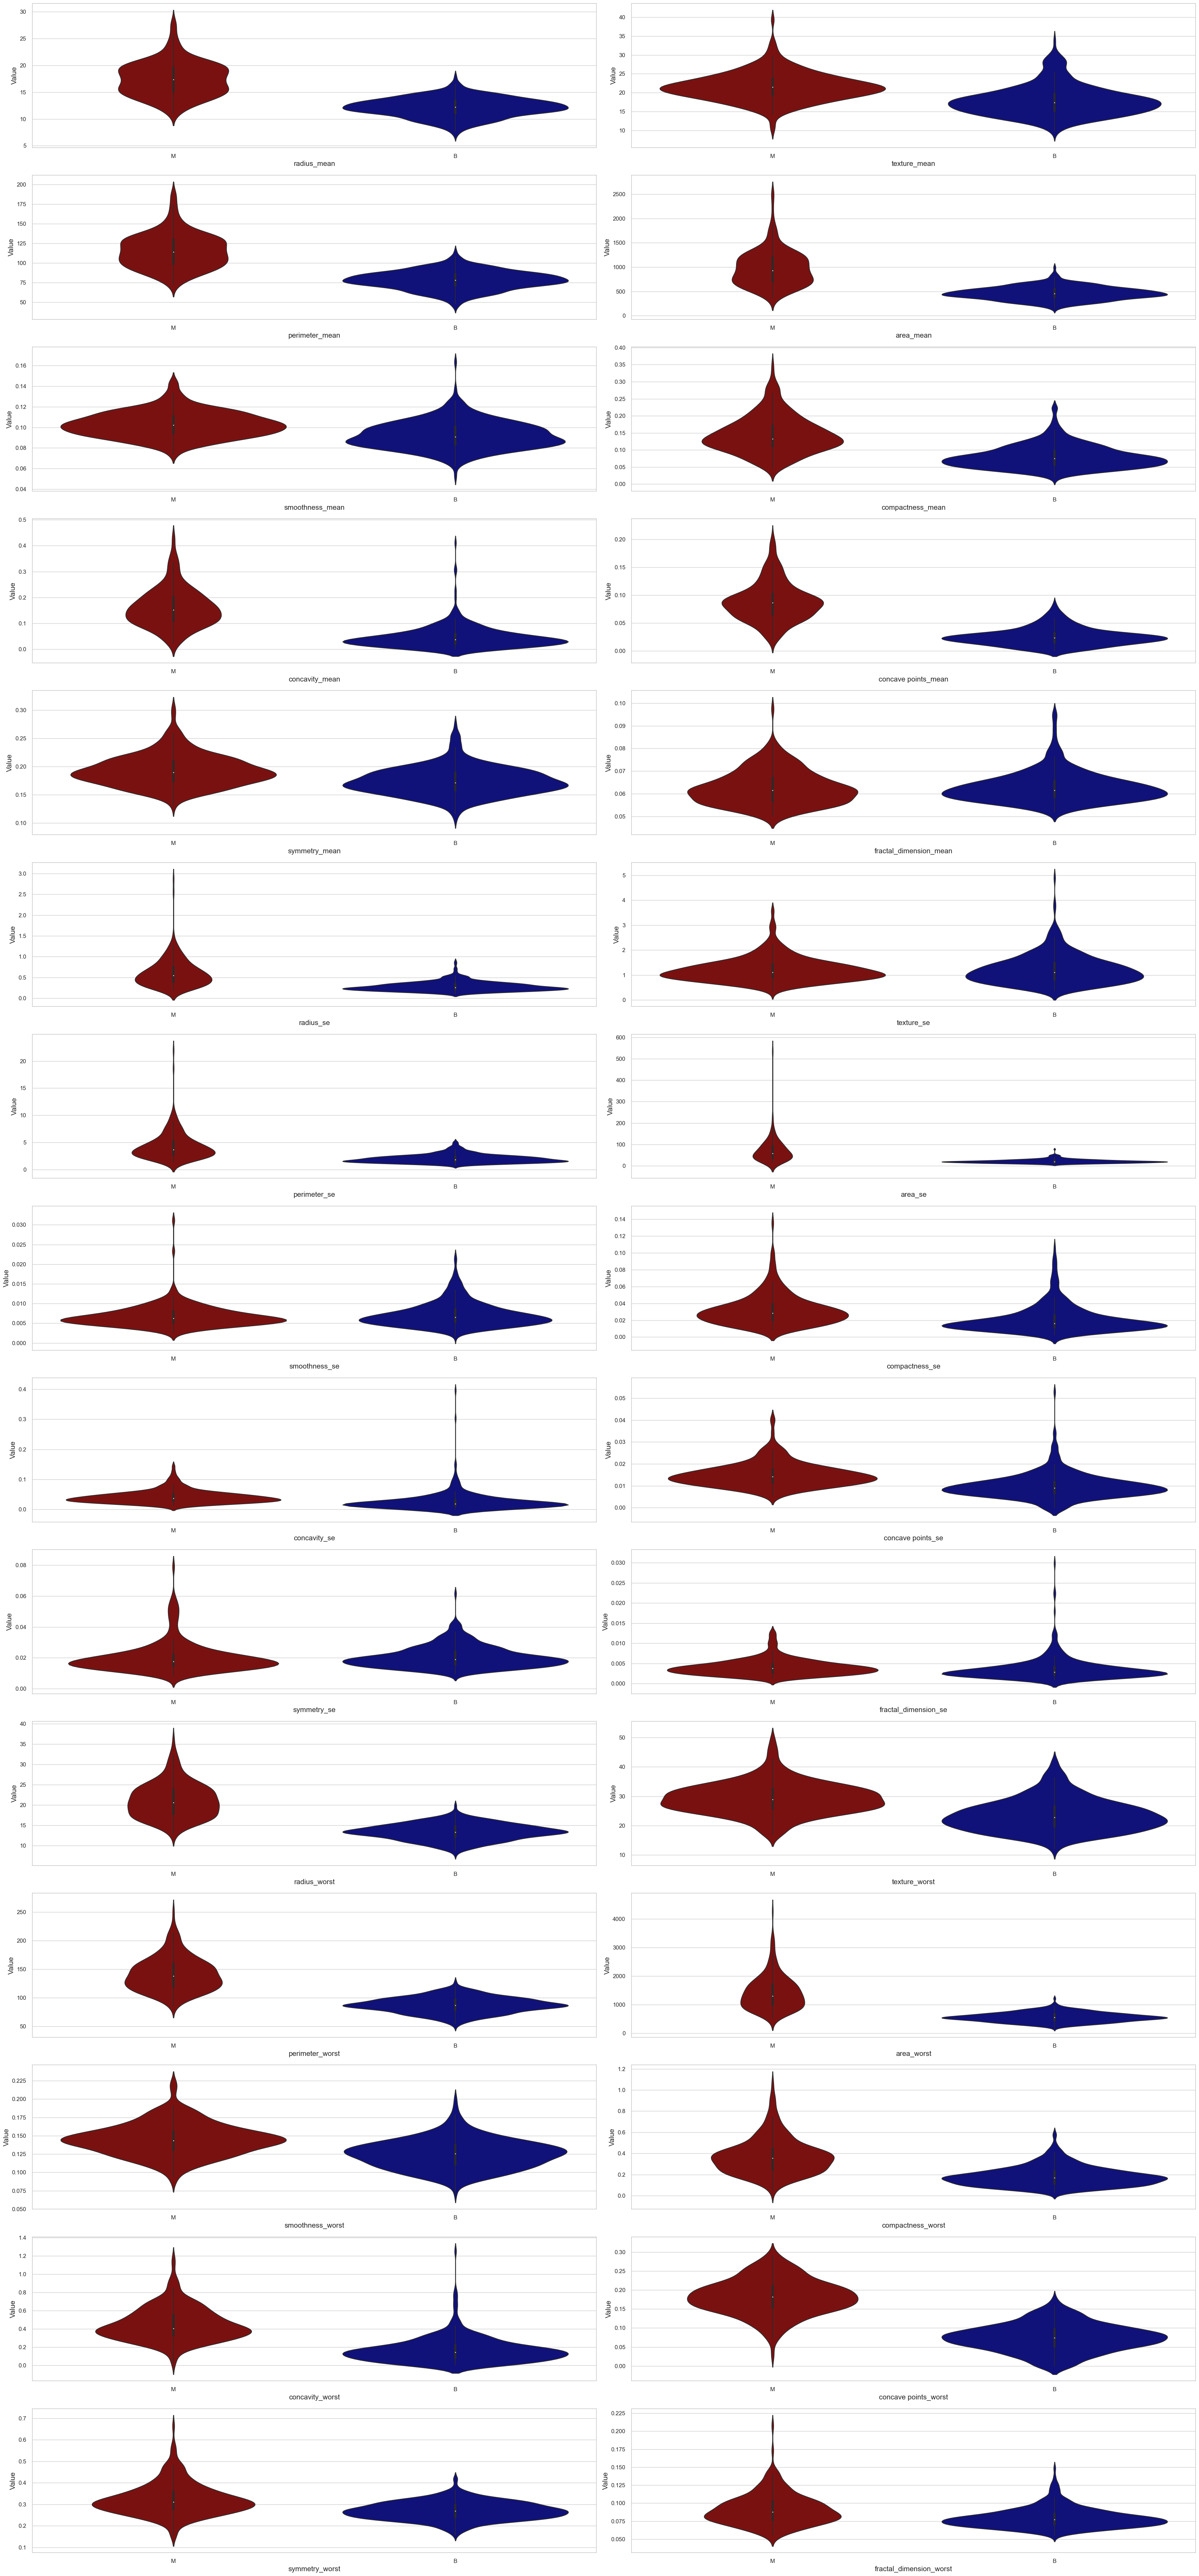

In [162]:
# Create violin plots for all features
fig, axs = plt.subplots(ncols=2, nrows=n_rows, figsize=(35, 5 * n_rows), dpi=100)
axs = axs.flatten()  # Flatten the array of axes for easy iteration

# Loop through each feature and create a violin plot
for i, col in enumerate(features):
    sns.violinplot(x='diagnosis', y=col, data=df, ax=axs[i], palette=palette)
    axs[i].set_xlabel(col, fontsize=15)
    axs[i].set_ylabel('Value', fontsize=15)
    axs[i].tick_params(axis='x', labelsize=12)
    axs[i].tick_params(axis='y', labelsize=12)

# Adjust layout to prevent overlap and display the plot
plt.tight_layout()
plt.show()

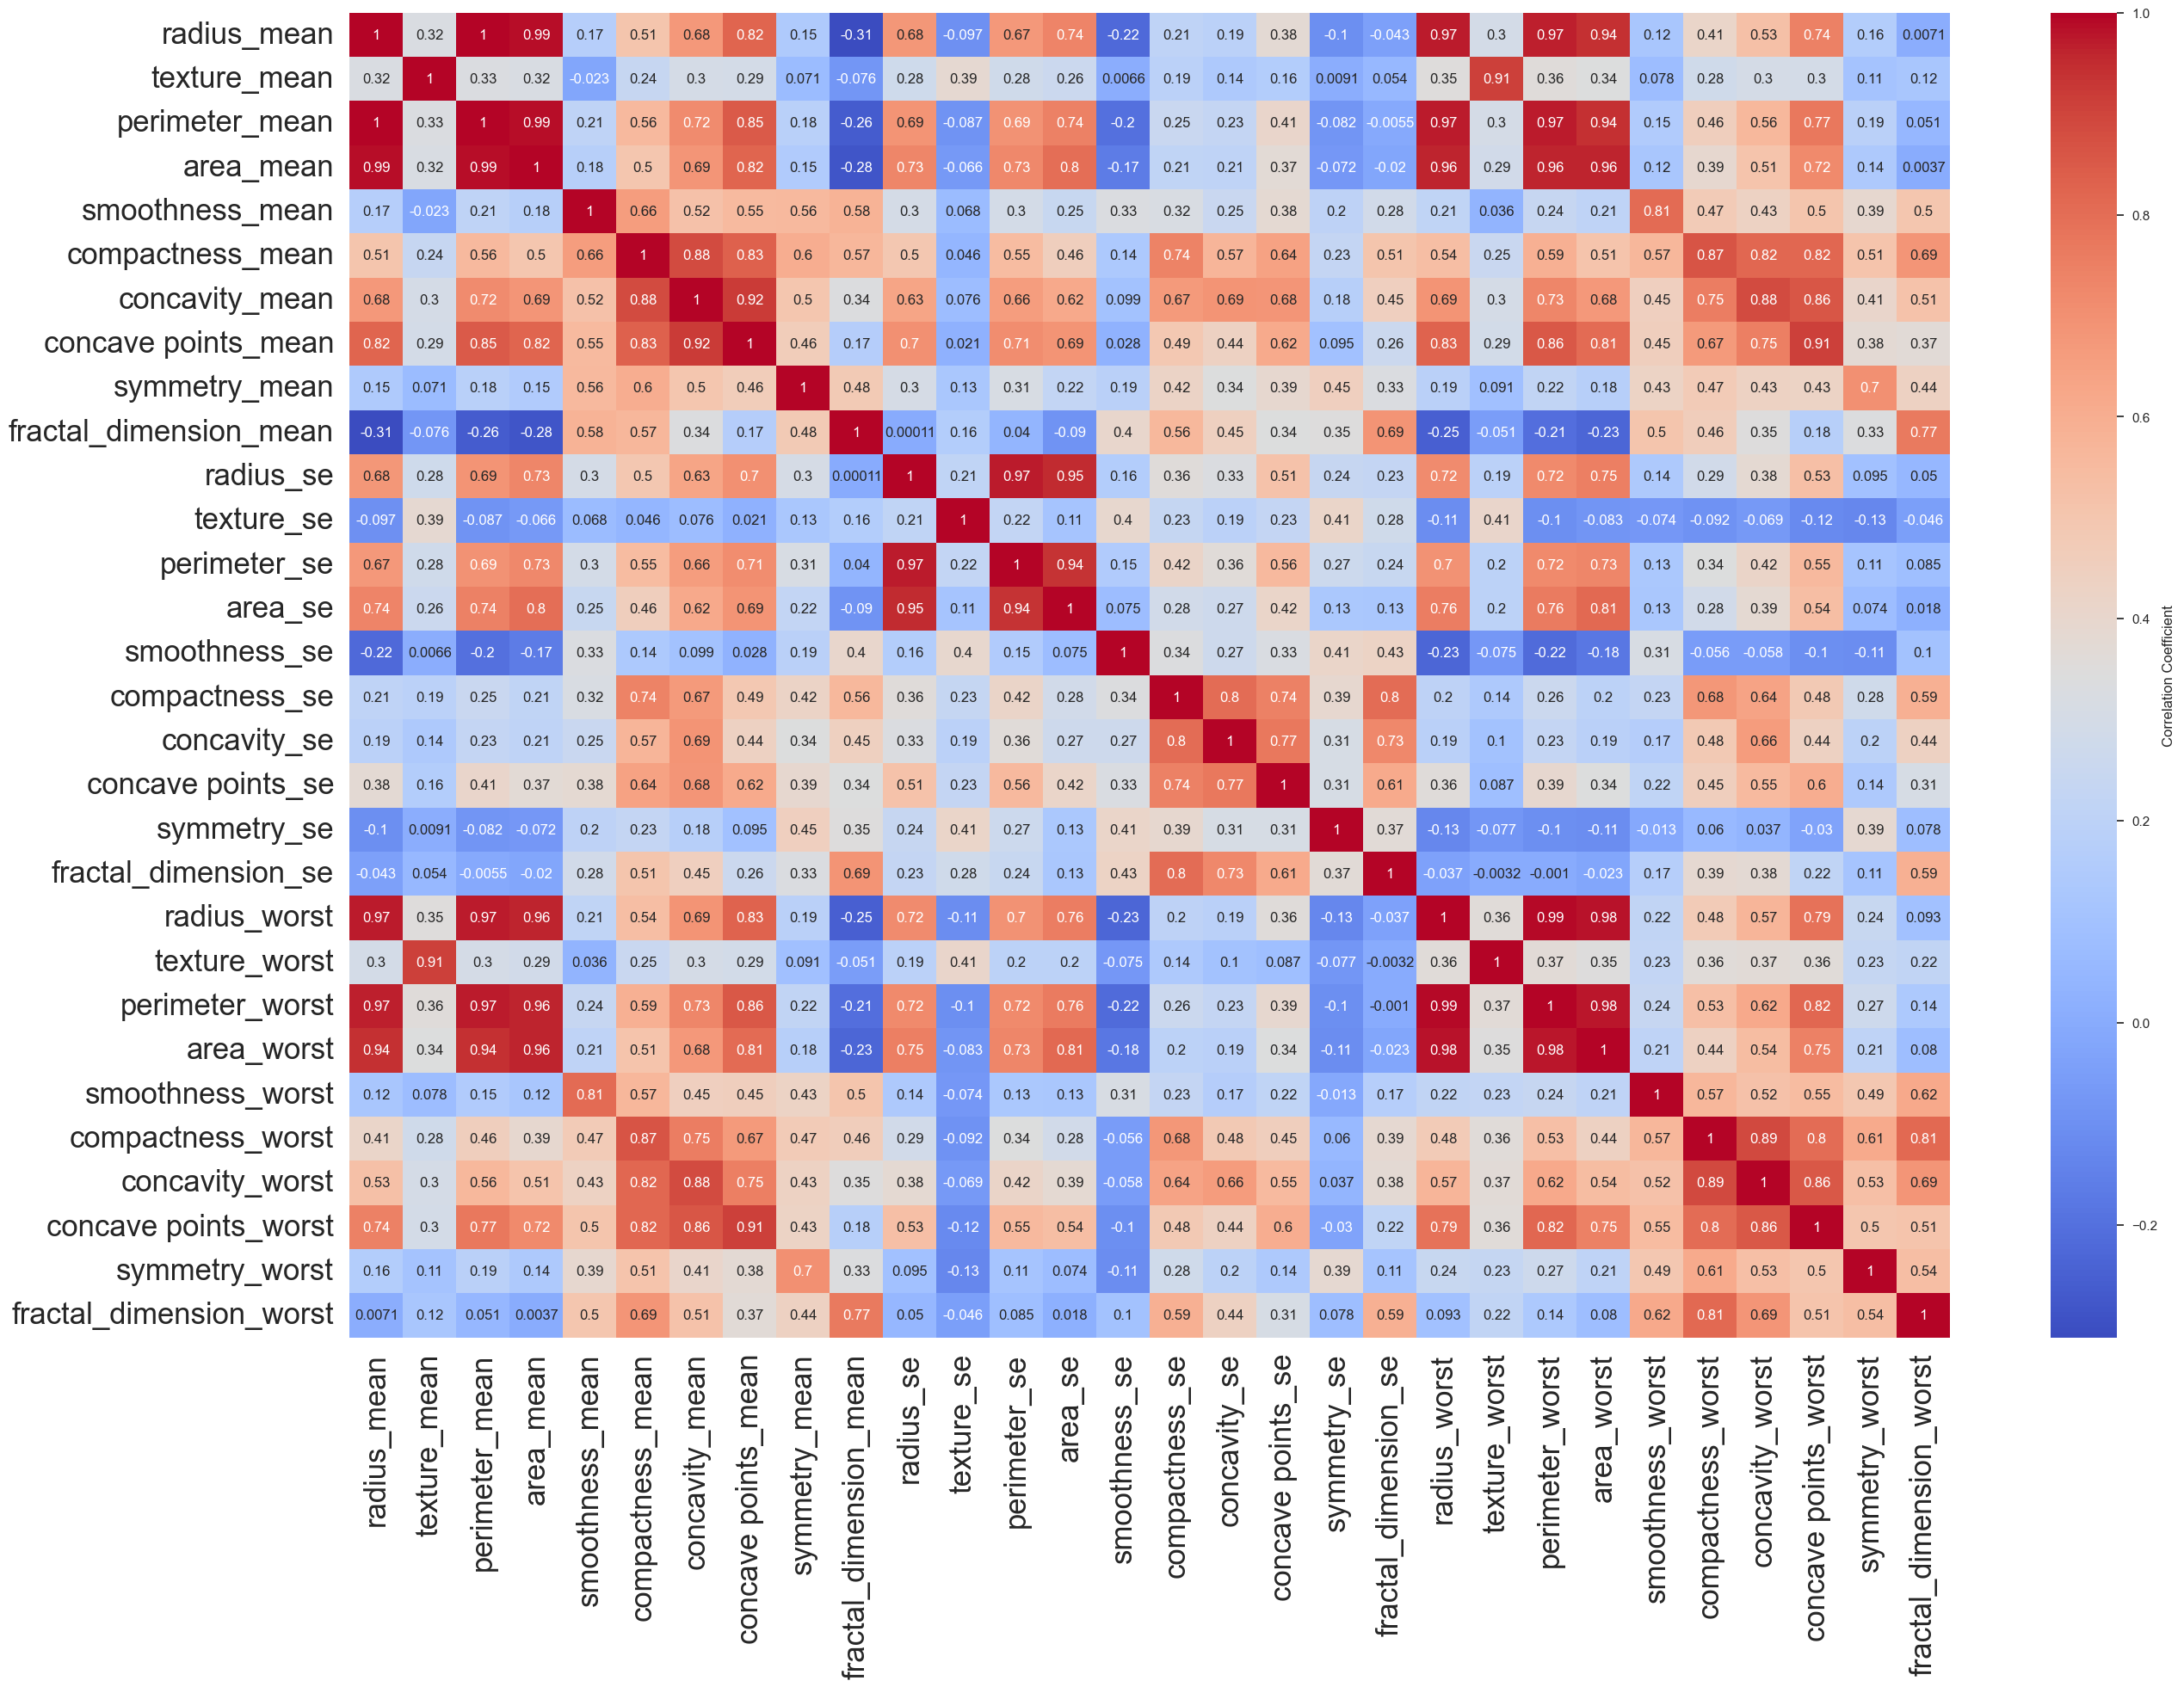

In [163]:
# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(30, 20))

# Create the heatmap with annotations using a blue-to-red color gradient
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, cbar_kws={'label': 'Correlation Coefficient'})

# Customize the x and y ticks
plt.xticks(fontsize=25, rotation=90)
plt.yticks(fontsize=25, rotation=0)

# Display the heatmap
plt.show()


Analysis

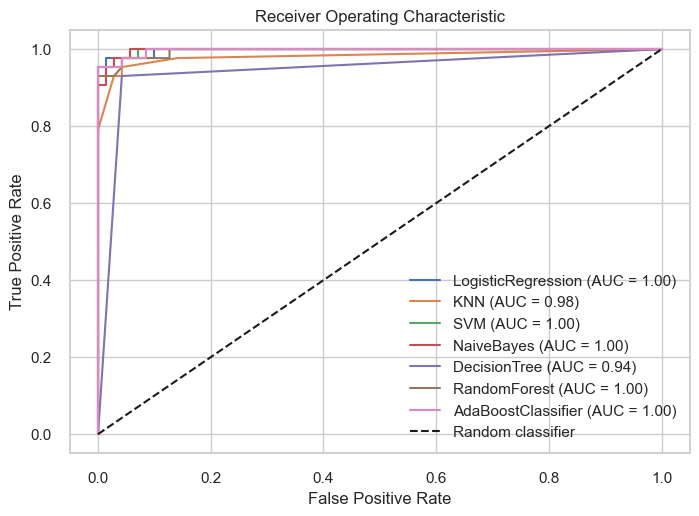

In [165]:
# Encode 'diagnosis' column: Malignant (M) to 1 and Benign (B) to 0
df['diagnosis'] = df['diagnosis'].replace({'M': 1, 'B': 0})

# Standardize the feature columns
scaler = preprocessing.StandardScaler()
X = df.drop(columns='diagnosis').values
X = scaler.fit_transform(X)
Y = df['diagnosis'].values.reshape(-1, 1)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the models to be used
models = [
    LogisticRegression(random_state=42),
    KNeighborsClassifier(),
    SVC(probability=True, random_state=42),
    GaussianNB(),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    AdaBoostClassifier()
]

# Corresponding model names
model_names = [
    'LogisticRegression', 
    'KNN', 
    'SVM', 
    'NaiveBayes', 
    'DecisionTree', 
    'RandomForest', 
    'AdaBoostClassifier'
]

# List to store AUC scores
auc_scores = []

# Train each model, predict probabilities, calculate AUC, and plot ROC curve
for model, name in zip(models, model_names):
    model.fit(x_train, y_train)
    y_pred_prob = model.predict_proba(x_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    auc_score = auc(fpr, tpr)
    auc_scores.append(auc_score)
    plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (name, auc_score))

# Plot the random classifier ROC curve
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')

# Label the axes and title the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')

# Display the plot
plt.show()


In [148]:
# Lists to store evaluation metrics
f1_scores = []
recall = []
precision = []

# Evaluate each model and store the F1-score, precision, and recall
for model, name in zip(models, model_names):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    f1 = f1_score(y_test, y_pred)
    r = recall_score(y_test, y_pred)
    p = precision_score(y_test, y_pred)
    f1_scores.append(f1)
    recall.append(r)
    precision.append(p)
    print('%s: F1-score = %0.3f' % (name, f1))
    print('%s: Precision = %0.3f' % (name, p))
    print('%s: Recall = %0.3f' % (name, r))
    print('\n')

# Calculate and print the average F1-score across all models
average_f1_score = sum(f1_scores) / len(f1_scores)
print('Average F1-score:', average_f1_score)


LogisticRegression: F1-score = 0.965
LogisticRegression: Precision = 0.976
LogisticRegression: Recall = 0.953


KNN: F1-score = 0.930
KNN: Precision = 0.930
KNN: Recall = 0.930


SVM: F1-score = 0.965
SVM: Precision = 0.976
SVM: Recall = 0.953


NaiveBayes: F1-score = 0.952
NaiveBayes: Precision = 0.976
NaiveBayes: Recall = 0.930


DecisionTree: F1-score = 0.930
DecisionTree: Precision = 0.930
DecisionTree: Recall = 0.930


RandomForest: F1-score = 0.952
RandomForest: Precision = 0.976
RandomForest: Recall = 0.930


AdaBoostClassifier: F1-score = 0.965
AdaBoostClassifier: Precision = 0.976
AdaBoostClassifier: Recall = 0.953


Average F1-score: 0.9513349525856855


Modeling

In [149]:
# Define the Support Vector Machine (SVM) model
SVM = SVC()

# Define the parameter grid for GridSearchCV
C = [0.1, 1, 10, 100]
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
params = {'C': C, 'kernel': kernel}

# Perform grid search with cross-validation to find the best hyperparameters
SVM_grid = GridSearchCV(estimator=SVM, param_grid=params, refit=True, verbose=0, n_jobs=-1)
SVM_grid.fit(x_train, y_train.ravel())

# Print the best parameters and the best score
print(f"Best parameters: {SVM_grid.best_params_}")
print(f"Best score: {SVM_grid.best_score_}")


Best parameters: {'C': 0.1, 'kernel': 'linear'}
Best score: 0.9758241758241759


In [150]:
# Define the Logistic Regression model
LogReg = LogisticRegression(max_iter=10000)

# Define the parameter grid for GridSearchCV
penalty = ['l1', 'l2', 'elasticnet']
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
C = [0.001, 0.01, 0.1, 1, 10, 100]
params2 = {'C': C, 'penalty': penalty, 'solver': solver}

# Perform grid search with cross-validation to find the best hyperparameters
LogReg_grid = GridSearchCV(estimator=LogReg, param_grid=params2, refit=True, verbose=0, n_jobs=-1)
LogReg_grid.fit(x_train, y_train.ravel())

# Print the best parameters and the best score
print(f"Best parameters: {LogReg_grid.best_params_}")
print(f"Best score: {LogReg_grid.best_score_}")


Best parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best score: 0.9780219780219781


In [151]:
# Define the AdaBoostClassifier model
AdaBoost = AdaBoostClassifier()

# Define the parameter grid for GridSearchCV
n_estimators = [50, 100, 200, 300]
learning_rate = [0.001, 0.01, 0.1, 1, 10]

params3 = {'n_estimators': n_estimators, 'learning_rate': learning_rate}

# Perform grid search with cross-validation to find the best hyperparameters
AdaBoost_grid = GridSearchCV(estimator=AdaBoost, param_grid=params3, refit=True, verbose=0, n_jobs=-1)
AdaBoost_grid.fit(x_train, y_train.ravel())

# Print the best parameters and the best score
print(f"Best parameters: {AdaBoost_grid.best_params_}")
print(f"Best score: {AdaBoost_grid.best_score_}")

Best parameters: {'learning_rate': 1, 'n_estimators': 300}
Best score: 0.9758241758241759


Final Model

Accuracy: 0.9912280701754386 

F1 score: 0.988235294117647 

Classification report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        71
           1       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114
 



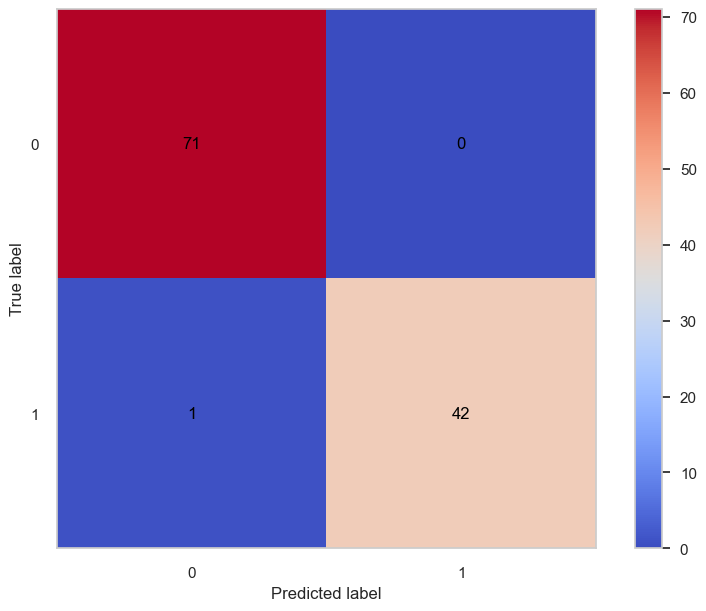

In [152]:
# Initialize the Logistic Regression model with specific hyperparameters
LogReg = LogisticRegression(solver='liblinear', C=0.1, penalty='l2')

# Train the model on the training data
LogReg.fit(x_train, y_train.ravel())

# Predict the labels on the test data
y_pred = LogReg.predict(x_test)

# Calculate and print the accuracy
print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred)} \n")

# Calculate and print the F1 score
print(f"F1 score: {metrics.f1_score(y_test, y_pred)} \n")

# Print the classification report
print(f"Classification report:\n {metrics.classification_report(y_test, y_pred)} \n")

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix with customizations
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(10, 7))
cmap = plt.cm.coolwarm  # Blue-to-red color gradient

# Plot confusion matrix without grid lines and with custom settings
disp.plot(cmap=cmap, ax=ax, colorbar=True)
ax.grid(False)
for texts in disp.text_.ravel():
    texts.set_color('black')

plt.show()